Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file and display the variables names.

In [2]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()
resp.columns

Index([         u'caseid',         u'rscrinf',        u'rdormres',
              u'rostscrn',     u'rscreenhisp',     u'rscreenrace',
                 u'age_a',           u'age_r',         u'cmbirth',
               u'agescrn', 
       ...
            u'pubassis_i',         u'basewgt', u'adj_mod_basewgt',
              u'finalwgt',          u'secu_r',            u'sest',
               u'cmintvw',         u'cmlstyr',      u'screentime',
             u'intvlngth'],
      dtype='object', length=3087)

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

In [3]:
import thinkstats2
hist = thinkstats2.Hist(resp.totincr)
print type(hist)

<class 'thinkstats2.Hist'>


Display the histogram.

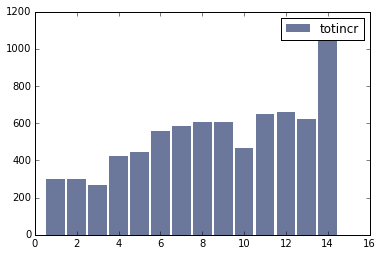

In [4]:
import thinkplot
thinkplot.Hist(hist, label='totincr')
thinkplot.Show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

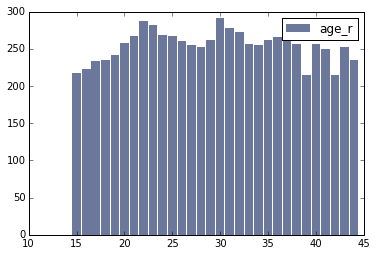

In [5]:
hist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(hist, label='age_r')
thinkplot.Show()

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

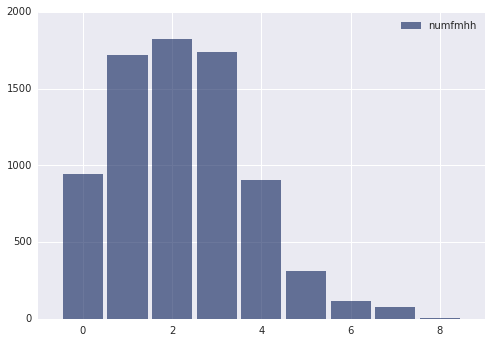

In [9]:
import seaborn as sns
thinkplot.Hist(thinkstats2.Hist(resp.numfmhh), label = 'numfmhh')
thinkplot.Show()

Make a histogram of <tt>parity</tt>, the number children the respondent has borne.  How would you describe this distribution?

In [ ]:
thinkplot.Hist(thinkstats2.Hist(resp.numfmhh), label = 'numfmhh')
thinkplot.Show()

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [16]:
from thinkstats2 import Hist
largest = Hist.Largest(Hist(resp.parity))
for val, count in largest:
    print "Value: " + str(val) + ", Count: " + str(count)

Value: 22, Count: 1
Value: 16, Count: 1
Value: 10, Count: 3
Value: 9, Count: 2
Value: 8, Count: 8
Value: 7, Count: 15
Value: 6, Count: 29
Value: 5, Count: 95
Value: 4, Count: 309
Value: 3, Count: 828


Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

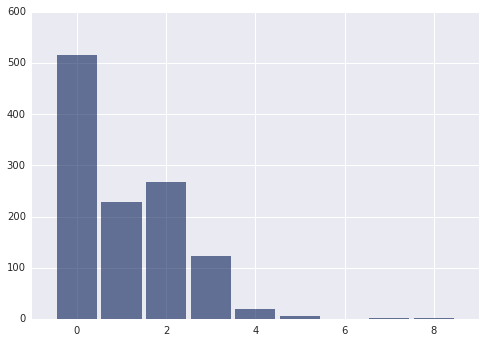

In [17]:
high_income = resp[resp.totincr == 14]
thinkplot.Hist(Hist(high_income.parity), label = 'parity')

Find the largest parities for high income respondents.

In [18]:
largest = Hist.Largest(Hist(high_income.parity))
for val, count in largest:
    print "Value: " + str(val) + ", Count: " + str(count)

Value: 8, Count: 1
Value: 7, Count: 1
Value: 5, Count: 5
Value: 4, Count: 19
Value: 3, Count: 123
Value: 2, Count: 267
Value: 1, Count: 229
Value: 0, Count: 515


Compare the mean <tt>parity</tt> for high income respondents and others.

In [22]:
others = resp[resp.totincr != 14]
print "Mean parity for high income: " + str(high_income.parity.mean())
print "Mean parity for others: " + str(others.parity.mean())

Mean parity for high income: 1.07586206897
Mean parity for others: 1.24957581367


Investigate any other variables that look interesting.

In [53]:
hi_vc = high_income.hadsex.value_counts()
other_vc = others.hadsex.value_counts()

hi_vc = hi_vc.apply(lambda x: float(x) / hi_vc.sum())
other_vc = other_vc.apply(lambda x: float(x) / other_vc.sum())

print "Proportion of high income respondents who have had sex: " + str(hi_vc[1])
print "Proportion of other respondents who have had sex: " + str(other_vc[1])
print

hi_vc = high_income.insuranc.value_counts().sort_index()
other_vc = others.insuranc.value_counts().sort_index()

hi_vc = hi_vc.apply(lambda x: float(x) / hi_vc.sum())
other_vc = other_vc.apply(lambda x: float(x) / other_vc.sum())

print "Healthcare status proportions for high-income:"

print hi_vc

print
print "for others:"

print other_vc

Proportion of high income respondents who have had sex: 0.889655172414
Proportion of other respondents who have had sex: 0.887397809656

Healthcare status proportions for high-income:
1    0.037931
2    0.916379
3    0.019828
4    0.025862
dtype: float64

for others:
1    0.194663
2    0.581984
3    0.147771
4    0.075582
dtype: float64


### Exercise 4

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length? 

In [57]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

import nsfg
import math

fempreg = nsfg.ReadFemPreg()

firsts = fempreg[fempreg.birthord==1]
others = fempreg[fempreg.birthord>1]

print "Cohen's d for totalwgt_lb: " + str(CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb))
print "Cohen's d for prglngth: " + str(CohenEffectSize(firsts.prglngth, others.prglngth))

Cohen's d for totalwgt_lb: -0.0886729270726
Cohen's d for prglngth: 0.0288790446544
